<a href="https://colab.research.google.com/github/wd369018/Assignment/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
path = kagglehub.dataset_download(
    "iamsouravbanerjee/house-rent-prediction-dataset"
)

Using Colab cache for faster access to the 'house-rent-prediction-dataset' dataset.


In [ ]:
print(path)

/kaggle/input/house-rent-prediction-dataset


In [ ]:
df = pd.read_csv(path+'/House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
df.describe()


,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [ ]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


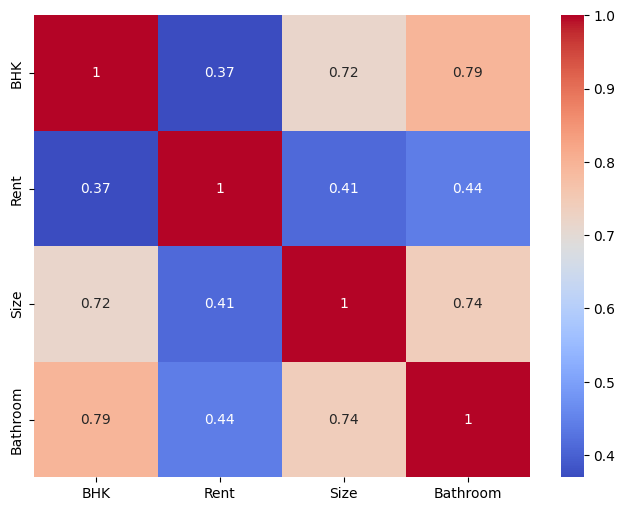

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
X = df[['BHK', 'Size', 'Bathroom','Floor']]
y = df['Rent']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_simple = df[['Size']]
y = df['Rent']

X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

In [ ]:
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model_simple.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2720800316.247958
RMSE: 52161.29135909078
R2: 0.3173048951366573


In [ ]:
X = df[['BHK', 'Size', 'Bathroom']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred = model_multi.predict(X_test)

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

MSE: 2554775777.0457582
RMSE: 50544.78981107507
R2: 0.3589632776073113


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Size']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

y_pred = model_poly.predict(X_test)

print("Polynomial R2:", r2_score(y_test, y_pred))

Polynomial R2: 0.340610245155221


In [ ]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.59041e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Lasso(alpha=0.01)

In [ ]:
print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))

Ridge R2: 0.34061024531391115
Lasso R2: 0.3406102450197609
